In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('ex1data1.txt')
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
Xd = data.drop(columns=['y'])
Xd.insert(0, 'x0', 1)
Xd.head()

,x0,x
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [4]:
Xd.iloc[0,:]

x0    1.0000
x     6.1101
Name: 0, dtype: float64

In [5]:
# Numpy array format
y = data.y.values
X = Xd.values

In [6]:
# sample size
m = len(data.index)
m

97

In [7]:
# number of features
n = X.shape[1]
n

2

In [8]:
theta = np.ones(n)
theta

array([1., 1.])

In [9]:
%%time
hypo = X @ theta

Wall time: 0 ns


In [10]:
hypo

array([ 7.1101,  6.5277,  9.5186,  8.0032,  6.8598,  9.3829,  8.4764,
        9.5781,  7.4862,  6.0546,  6.7107, 15.164 ,  6.734 ,  9.4084,
        6.6407,  6.3794,  7.3654,  6.1301,  7.4296,  8.0708,  7.1891,
       21.27  ,  6.4901,  7.3261,  6.5649, 19.945 , 13.828 , 11.957 ,
       14.176 , 23.203 ,  6.2524,  7.5894, 10.2482,  6.8918,  9.2111,
        8.9334,  9.0959,  6.6063, 13.836 ,  7.3534,  6.4069,  7.8825,
       12.708 ,  6.7737,  8.8247,  8.0931,  6.0702,  6.8014, 12.7   ,
        6.5416,  8.5402,  6.3077,  8.4239,  8.6031,  7.3328,  7.3589,
        7.2742,  6.6397, 10.3102, 10.4536,  9.8254,  6.1793, 22.279 ,
       15.908 , 19.959 ,  8.2182,  9.2951, 11.236 ,  6.4994, 21.341 ,
       11.136 ,  8.3345,  7.0062,  8.2259,  6.0269,  7.5479,  8.5386,
        6.0365, 11.274 ,  6.1077,  6.7292,  6.1884,  7.3557, 10.7687,
        7.5159,  9.5172, 10.1802,  7.002 ,  6.5204,  6.0594,  6.7077,
        8.6366,  6.8707,  6.3054,  9.2934, 14.394 ,  6.4369])

In [11]:
%%time
# cost function
cost = (1/(2*m))*np.transpose((X@theta - y))@(X@theta - y)

Wall time: 0 ns


In [12]:
cost

10.266520491383504

In [13]:
def cost(theta, X=X, y=y, m=m):
    cost = np.transpose((X@theta - y))@(X@theta - y)
    cost = (1/(2*m))*cost
    return cost

In [14]:
cost(theta)

10.266520491383504

In [15]:
%%time
dev = (1/m)*np.transpose(X)@(X@theta - y)

Wall time: 0 ns


In [16]:
dev

array([ 3.32066495, 24.23489308])

In [17]:
def cost_dev(thetar=theta, X=X, y=y, m=m):
    dev = np.transpose(X) @ (X@thetar - y)
    dev = (1/m)*dev
    return np.array(dev)

In [18]:
cost_dev()

array([ 3.32066495, 24.23489308])

In [19]:
(X@theta-y).shape

(97,)

In [20]:
X.shape

(97, 2)

In [21]:
# Learning rate
a = 0.01

In [22]:
theta = np.ones(n)
theta

array([1., 1.])

In [23]:
%%time
cost_list = []
for i in range(1000):
    theta = theta - a*(1/m)*np.transpose(X)@(X@theta - y)
    cost_val = cost(theta)
    cost_list.append(cost_val)

Wall time: 31.9 ms


Text(0.5, 1.0, 'Vectorization: MSE Trend over Iterations')

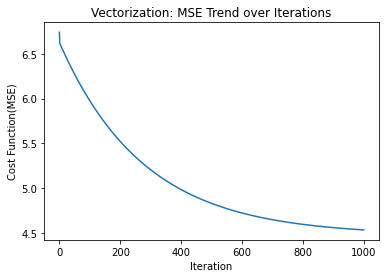

In [24]:
plt.plot(np.arange(0, 1000), cost_list)
plt.xlabel('Iteration'); plt.ylabel('Cost Function(MSE)'); plt.title('Vectorization: MSE Trend over Iterations')

In [25]:
cost_val

4.535377341908056

In [26]:
theta

array([-3.09481526,  1.11256796])

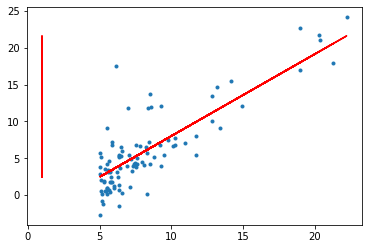

In [29]:
plt.scatter(data.values[:, 0], data.values[:, 1], marker='.')
plt.plot(X, X @ theta, color="red")